In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import pandas as pd
import re

In [3]:
def read_rewards(filename):
    rewards = []
    with open(filename, "r") as f:
        line = f.readline()
        while line:
            rew = float(line.split()[-1])
            rewards.append(rew)
            line = f.readline()
    return np.array(rewards)

def read_multi_rewards(filename, run, episodes):
    rewards = []
    for r in range(run):
        reward = read_rewards(filename+"_run"+str(r)+".txt")
        rewards.append(reward[:episodes])
    return np.array(rewards)

In [4]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return np.array(smoothed)

In [11]:
auxiliary = read_multi_rewards("data/cartpole_pixel/single", 5, 200)
single = read_multi_rewards("data/cartpole_pixel/single_noreg", 5, 200)
transfer = read_multi_rewards("data/cartpole_pixel/transfer_c1", 5, 200)

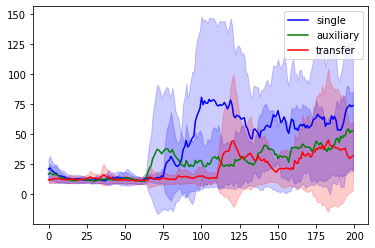

In [12]:
sm = 0.8
single_mean, single_std = smooth(single.mean(0), sm), smooth(single.std(0), sm)
transfer_mean, transfer_std = smooth(transfer.mean(0), sm), smooth(transfer.std(0), sm)
auxiliary_mean, auxiliary_std = smooth(auxiliary.mean(0), sm), smooth(auxiliary.std(0), sm)
n = len(single_mean)
xs = list(range(n))
plt.plot(xs, single_mean, color='b', label="single")
plt.fill_between(xs, single_mean-single_std, single_mean+single_std, color='b', alpha=0.2)
plt.plot(xs, auxiliary_mean, color='g', label="auxiliary")
plt.fill_between(xs, auxiliary_mean-auxiliary_std, auxiliary_mean+auxiliary_std, color='b', alpha=0.2)
plt.plot(xs, transfer_mean, color='r', label="transfer")
plt.fill_between(xs, transfer_mean-transfer_std, transfer_mean+transfer_std, color='r', alpha=0.2)
plt.legend()

plt.legend()
plt.show()
# plt.savefig("plots/cart_pixel.png", format="png")

In [8]:
auxiliary = read_multi_rewards("data/cartpole/source", 5, 200)
single = read_multi_rewards("data/cartpole/source_noreg", 5, 200)
transfer = read_multi_rewards("data/cartpole/source_transfer_c1", 5, 200)

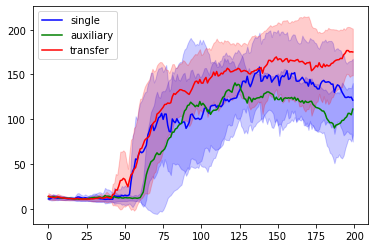

In [9]:
sm = 0.8
single_mean, single_std = smooth(single.mean(0), sm), smooth(single.std(0), sm)
transfer_mean, transfer_std = smooth(transfer.mean(0), sm), smooth(transfer.std(0), sm)
auxiliary_mean, auxiliary_std = smooth(auxiliary.mean(0), sm), smooth(auxiliary.std(0), sm)
n = len(single_mean)
xs = list(range(n))

plt.plot(xs, single_mean, color='b', label="single")
plt.fill_between(xs, single_mean-single_std, single_mean+single_std, color='b', alpha=0.2)
plt.plot(xs, auxiliary_mean, color='g', label="auxiliary")
plt.fill_between(xs, auxiliary_mean-auxiliary_std, auxiliary_mean+auxiliary_std, color='b', alpha=0.2)
plt.plot(xs, transfer_mean, color='r', label="transfer")
plt.fill_between(xs, transfer_mean-transfer_std, transfer_mean+transfer_std, color='r', alpha=0.2)
plt.legend()
plt.show()
# plt.savefig("plots/compare.png", format="png")